#**CLASSIFICATION**


  - a supervised machine learning method where the model tries to predict the correct label of a given input data.

  ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Generate a synthetic dataset

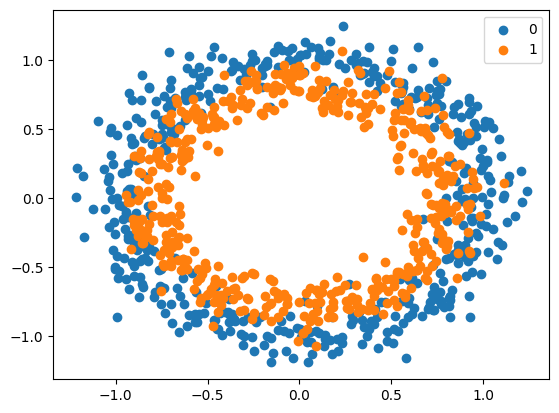

In [1]:
from sklearn.datasets import make_circles																				#Importing Libraries
from numpy import where
from matplotlib import pyplot

X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)									#Generating the Dataset

for i in range(2):																															# select indices of points with each class label
	samples_ix = where(y == i)
	pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1], label=str(i))

pyplot.legend()																																	#Displaying the Legend and Plot
pyplot.show()

In [2]:
from keras.models import Sequential                                             #for Data Preparation
from keras.layers import Dense                                                  #for Model Definition
from tensorflow.keras.optimizers import SGD                                     #for Compilation and Training

print(type(X))                                                                  #Printing Types of Variables
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Splitting the Dataset into Training and Testing Sets

In [3]:
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
n_train=500
trainX = X[:n_train,:]
testX = X[n_train:, :]
trainy = y[:n_train]
testy = y[n_train:]


Build the model

In [6]:
#2 --> 10 ---> 10 ---> 1
num_classes = 4
deep_model_class = Sequential()
deep_model_class.add(Dense(10,input_dim=2, activation = 'relu'))                #input layer
deep_model_class.add(Dense(10,activation='relu'))                               #hidden layer
deep_model_class.add(Dense(num_classes,activation = 'softmax'))                 #output layer
                                                                                #'num_classes' neurons and softmax activation for multi-class classification.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile the model

In [7]:
opt = SGD(learning_rate=0.01, momentum=0.9)                                     #create the optimizer

deep_model_class.compile(loss = 'sparse_categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])


Fit the model - model training

In [8]:
history = deep_model_class.fit(trainX, trainy, validation_data=(testX,testy), epochs=200, verbose=1,batch_size=32)

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.2068 - loss: 1.5055 - val_accuracy: 0.5380 - val_loss: 1.1448
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4926 - loss: 1.0836 - val_accuracy: 0.5060 - val_loss: 0.9096
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4315 - loss: 0.8935 - val_accuracy: 0.5160 - val_loss: 0.8041
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4733 - loss: 0.8048 - val_accuracy: 0.5340 - val_loss: 0.7576
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4938 - loss: 0.7540 - val_accuracy: 0.5180 - val_loss: 0.7303
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4881 - loss: 0.7360 - val_accuracy: 0.5720 - val_loss: 0.7145
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5640 - loss: 0.7122 - val_accuracy: 0.5340 - val_loss: 0.7059
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5610 - loss: 0.7044 - val_accuracy: 0.5800 - 

Evaluate the model

Train: 0.814, Test: 0.828


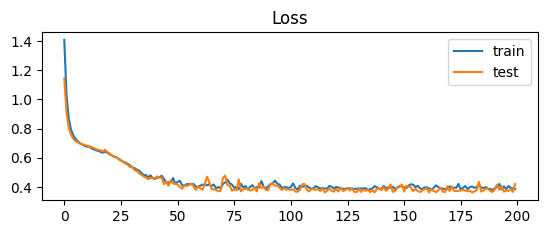

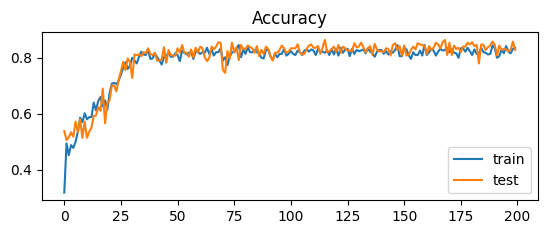

In [9]:
_, train_acc = deep_model_class.evaluate(trainX, trainy, verbose=0)
_, test_acc = deep_model_class.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
                                                                                # plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
                                                                                # plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()


Build and train a simple MLP for a binary classification task using Keras
  - MLP for the circles problem with cross entropy loss

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train: 0.836, Test: 0.848


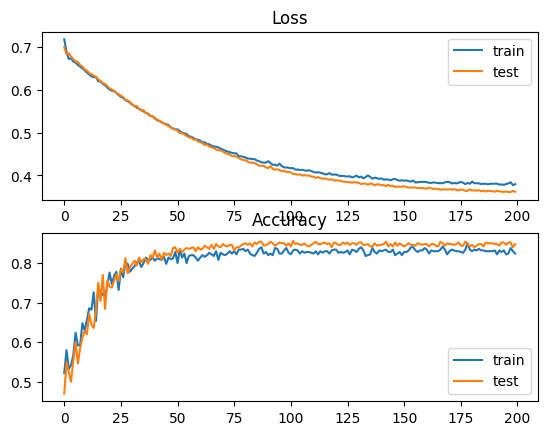

In [11]:
                                                                                #Importing libraries
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot
                                                                                # generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
                                                                                # split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
                                                                                # define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
                                                                                # fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
                                                                                # evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
                                                                                # plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
                                                                                # plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()
